In [19]:
# import package
%matplotlib widget
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import scipy

Particle Swarm Optimization (PSO) is inspired by the social behavior of birds flocking or fish schooling.

In PSO, a group of candidate solutions, called particles, move through the search space to find the optimal solution. Each particle has a position (representing a potential solution) and a velocity (representing the direction and speed of its movement).

Each particle adjusts its position based on:
- Its own best-known position (called personal best or `pbest`)
- The best-known position of the entire swarm (called global best or `gbest`)
 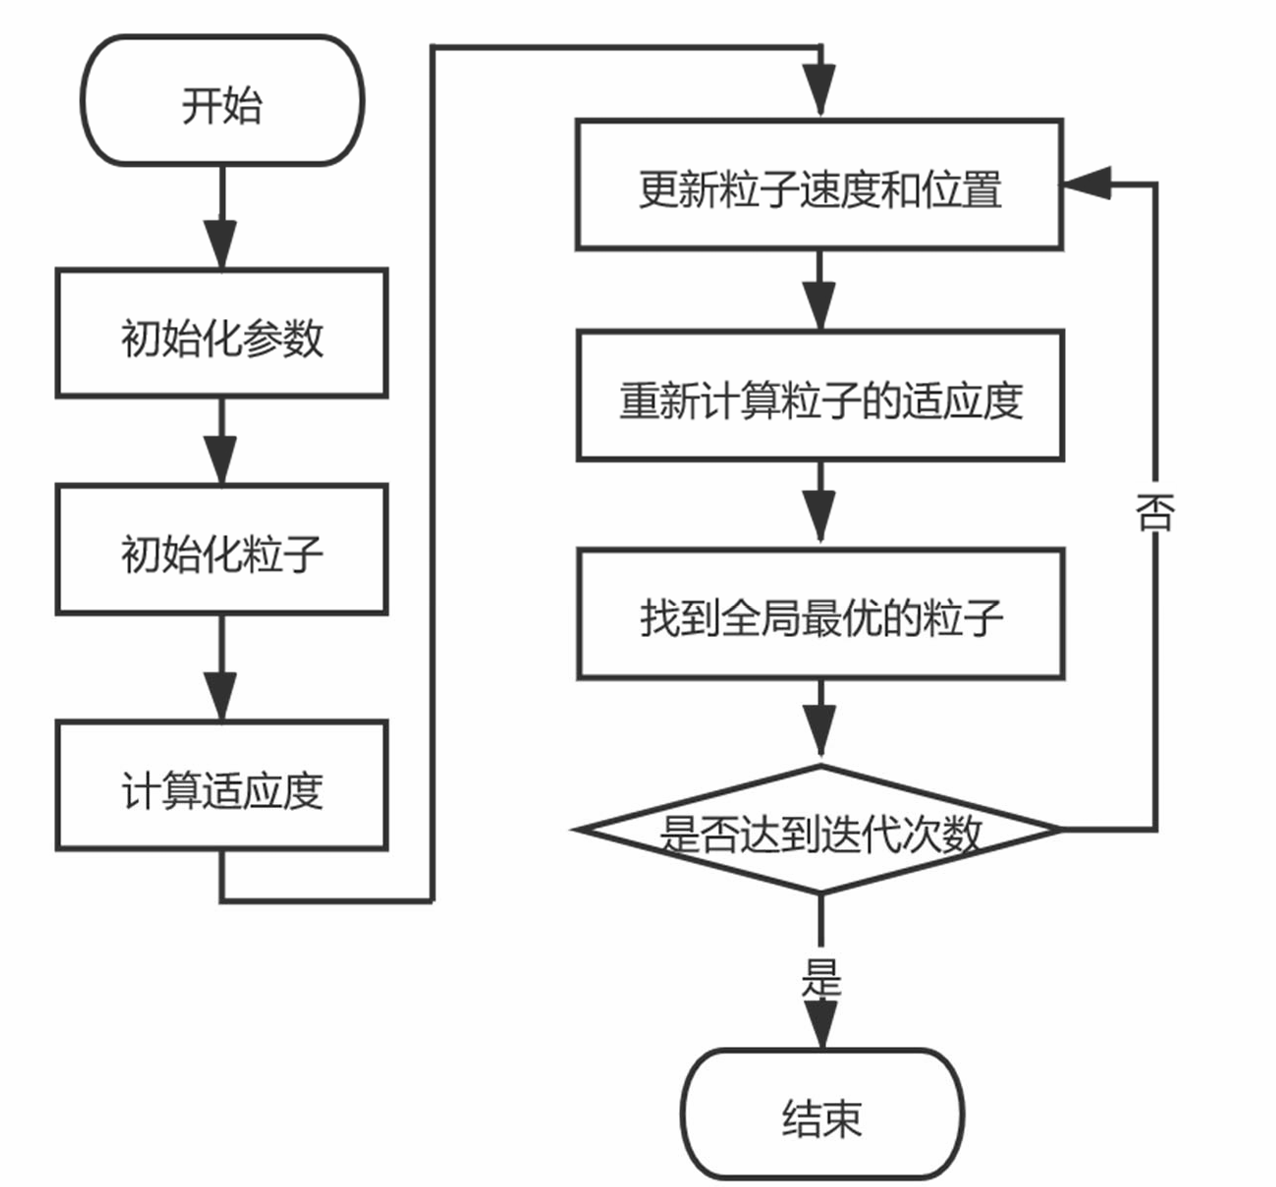

Basic symbols
- $n$: the number of particles
- $c_1$: Cognitive learning factor of a particle (also called the cognitive acceleration factor)
- $c_2$: Social learning factor of a particle (also called the social acceleration factor)
- $w$: Inertia weight of the velocity
- $v^d_i$: Velocity of the $i$th particle at the $d$th iteration
- $x^d_i$: Position of the $i$th particle at the $d$th iteration
- $f(x)$: Fitness value at position $x$ (usually the value of the objective function)
- $pbest_i^d$: The best position visited by the $i$th particle up to the $d$th iteration
- $gbest^d$: The best position visited by all particles up to the $d$th iteration

---
The velocity at the $d$th iteration $=$ inertia velocity of last iteration $+$ cognitive factor $+$ social factor
$$
v^d_i = wv_i^{d-1}+c_1r_1(pbest_i^d-x^d_i) + c_2r_2(gbest^d-x_i^d)
$$
where $r_1$ and $r_2$ are two random value in $[0,1]$.

The position at the $d+1$th iteration $=$ The position at the $d$th iteration $+$ velocity at $d$th iteration $\times$ the duration 
$$
x_i^{d+1} = x_i^d+v^d_i
$$

Fllowing "SHI,Y. A Modified Particle Swarm Optimizer[C] Proc. of IEEE ICEC conference, Anchorage. 1998.", the inertia weight should take $[0.9,1.2]$.

## Example:
Find the maximum of $f$ with $x\in [-3,3]$ :
$$
f(x) = 11\sin x+7\cos(5x)
$$

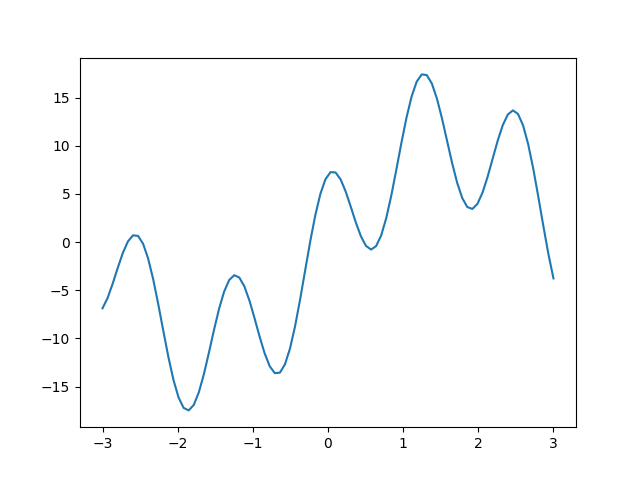

In [2]:
xx = np.linspace(-3,3,90)
yy = 11*np.sin(xx)+7*np.cos(5*xx)
plt.plot(xx,yy)

plt.show()

In [136]:
# initialize the parameter 
np.random.seed(121)
def obj_f(x):
    return 11*np.sin(x)+7*np.cos(5*x)
x_lb,x_ub = -3,3

# initialize the particles
n = 10 # the number of particles
c1 = 2
c2 = 2
w = 0.9
K = 50 # iteration
vmax = 1.2 # the maximum velocity
x = x_lb+(x_ub-x_lb)*np.random.rand(n)

v = -1*vmax + 2*vmax*np.random.rand(n)
# initialize a array to store
his_x = np.zeros((K,n))
his_v = np.zeros(K)

In [126]:
# use package
def obj_f_max(x):
    return -1*(11*np.sin(x)+7*np.cos(5*x))

from scipy.optimize import minimize_scalar
res = minimize_scalar(obj_f_max,bounds=[-3,3] ,method='bounded')

print('maximal position->',res.x)
print('maximum->',-1*res.fun)

maximal position-> 1.2749864897146346
maximum-> 17.492789420899456


In [137]:
# calculate the fitness
fit = np.zeros((n,narvs))
for i in range(n):
    fit[i] = obj_f(x[i])

pbest = x # personal recognition 
ind = np.argmax(fit)
gbest = x[ind] # global recognition

In [138]:
for d in range(K):
    for i in range(n):
        # core iterative equation
        v[i] = w*v[i]+c1*np.random.rand()*(pbest[i]-x[i])+c2*np.random.rand()*(gbest-x[i])
        # make sure it does not overspeed
        if v[i] < -vmax:
            v[i] = -vmax
        elif v[i] > vmax:
            v[i] = vmax
        # update velocity and position
        x[i] += v[i]
        if x[i] < x_lb:
            x[i] = x_lb
        elif x[i] > x_ub:
            x[i] = x_ub
        # calculate the fitness
        fit[i] = obj_f(x[i])
        # find the optimal particle
        if fit[i] > obj_f(pbest[i]):
            pbest[i] = x[i]
        if obj_f(pbest[i]) > obj_f(gbest):
            gbest = pbest[i]
        his_x[d,i] = pbest[i]
    his_v[d] = obj_f(gbest)

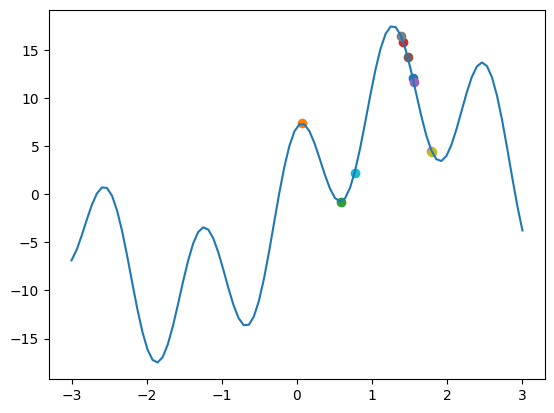

In [139]:
# draw the graph
final_point = his_x[-1,:]
for i in range(n):
    plt.scatter(final_point[i], obj_f(final_point[i]))
plt.plot(xx,yy)
plt.show()

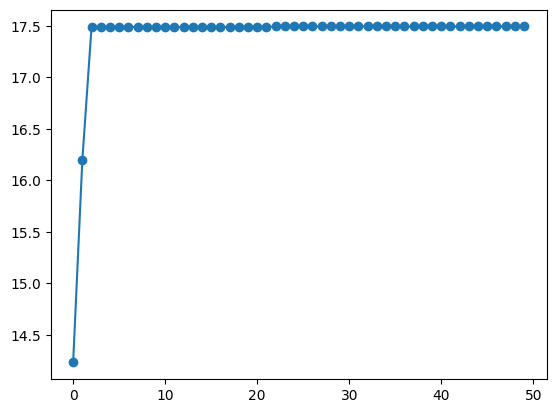

In [140]:
iterations = np.arange(0, 50)
plt.plot(iterations, his_v, '-o')
plt.show()

## Example2:
Find the maximum of $f$ with $x_1,x_2\in [-15,15]$ :
$$
f(x) = x_1^2+x_2^2-x_1x_2-10x_1-4x_2+60
$$

In [20]:
# define the function
def f_obj_two(x_1,x_2):
    return x_1**2+x_2**2-x_1*x_2-10*x_1-4*x_2+60

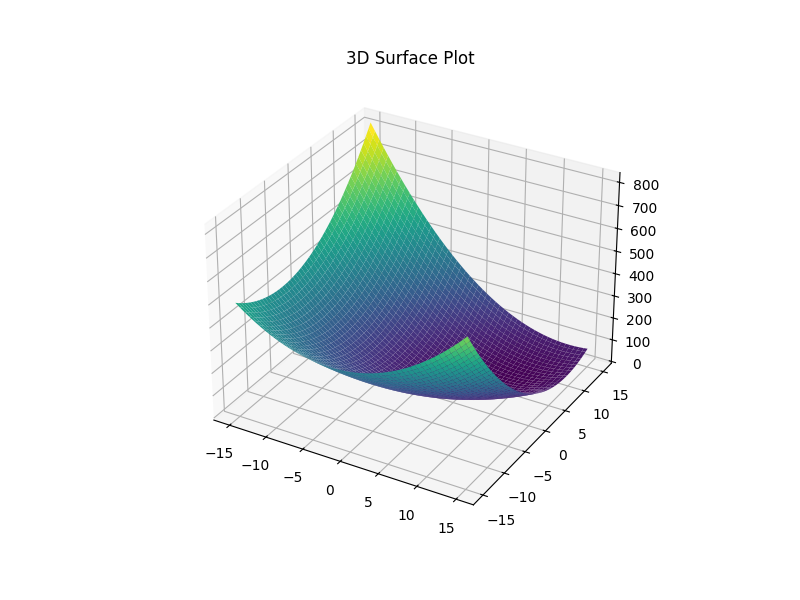

In [4]:
t_1 = np.linspace(-15, 15, 300)
t_2 = np.linspace(-15, 15, 300)
xx_1, xx_2 = np.meshgrid(t_1, t_2)
zz = f_obj_two(xx_1,xx_2)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(xx_1, xx_2, zz, cmap='viridis')
ax.set_title("3D Surface Plot")
plt.show()

In [21]:
# calculate the maximum
from scipy.optimize import minimize
bounds = [(-15, 15), (-15, 15)]
x0 = [0, 0]
def f_obj_temp(x):
    x_1,x_2 = x
    return x_1**2+x_2**2-x_1*x_2-10*x_1-4*x_2+60
res = minimize(f_obj_temp, x0, bounds=bounds)
print('minimal position->',res.x)
print('minimum->',res.fun)

minimal position-> [7.99999941 6.00000166]
minimum-> 8.000000000004086


In [22]:
# initialize the parameter 
np.random.seed(223)
x_lb,x_ub = np.array([-15,-15]),np.array([15,15])

# initialize the particles
n = 30 # the number of particles
c1 = 2
c2 = 2
w = 0.9
K = 100 # iteration
narvs = 2
vmin,vmax = np.array([-1.2,-1.2]),np.array([1.2,1.2]) # the maximum velocity
x = x_lb + np.random.rand(n,2) * (x_ub-x_lb)

v = vmin + 2*np.random.rand(n,2)*vmax
# initialize a array to store
his_x = np.zeros((K,n,2))
his_v = np.zeros(K)

In [23]:
# calculate the fitness
fit = np.zeros(n)
for i in range(n):
    fit[i] = f_obj_two(x[i,0],x[i,1])

pbest = x # personal recognition 
ind = np.argmin(fit)
gbest = x[ind] # global recognition

In [24]:
for d in range(K):
    for i in range(n):
        # core iterative equation
        v[i] = w*v[i]+c1*np.random.rand()*(pbest[i]-x[i])+c2*np.random.rand()*(gbest-x[i])
        # make sure it does not overspeed
        v[i] = np.clip(v[i], -1.2, 1.2)
        # update velocity and position
        x[i] += v[i]
        x[i] = np.clip(x[i], -15, 15)
        # calculate the fitness
        fit[i] = f_obj_two(x[i,0],x[i,1])
        # find the optimal particle
        if fit[i] < f_obj_two(pbest[i,0],pbest[i,1]):
            pbest[i] = x[i].copy()
        if f_obj_two(pbest[i,0],pbest[i,1]) < f_obj_two(gbest[0],gbest[1]):
            gbest = pbest[i].copy()
        his_x[d,i] = pbest[i].copy()
    his_v[d] = f_obj_two(gbest[0],gbest[1])

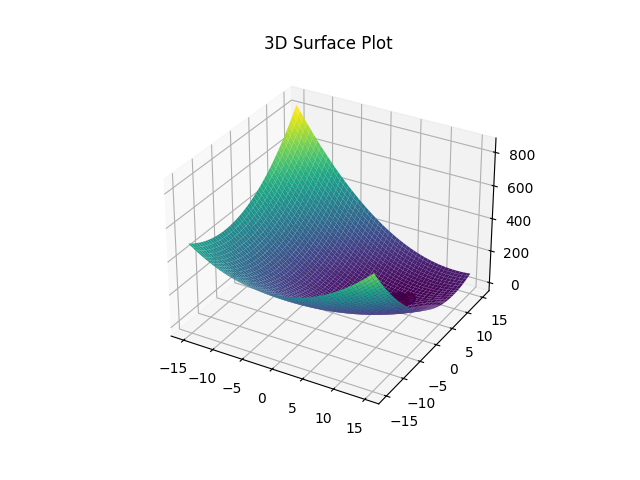

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx_1, xx_2, zz, cmap='viridis')
point = his_x[-1,:]
value = np.zeros(n)
for i in range(n):
    value[i] = f_obj_two(point[i,0],point[i,1])
ax.scatter(point[:,0], point[:,1], value, color='red', s=50, edgecolor='k', alpha=0.8, depthshade=False)
ax.set_title("3D Surface Plot")
plt.show()

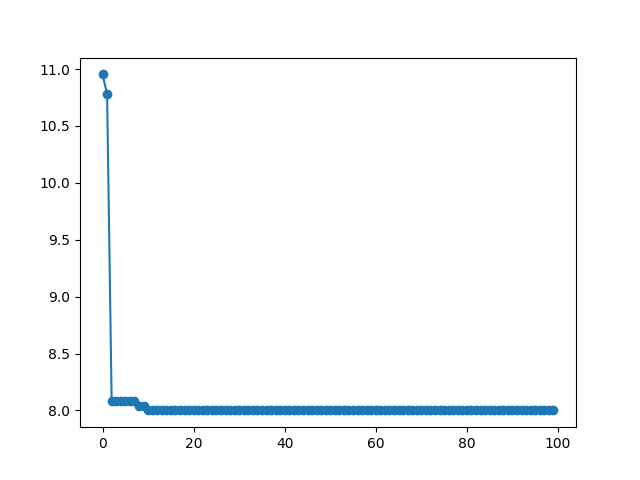

In [26]:
fig = plt.figure()

iterations = np.arange(0, K)
plt.plot(iterations, his_v, '-o')
plt.show()